# Write a MATLAB/Python program to separation of voiced/un-voiced/silence regions from a speech signal.

In [ ]:
!pip install librosa

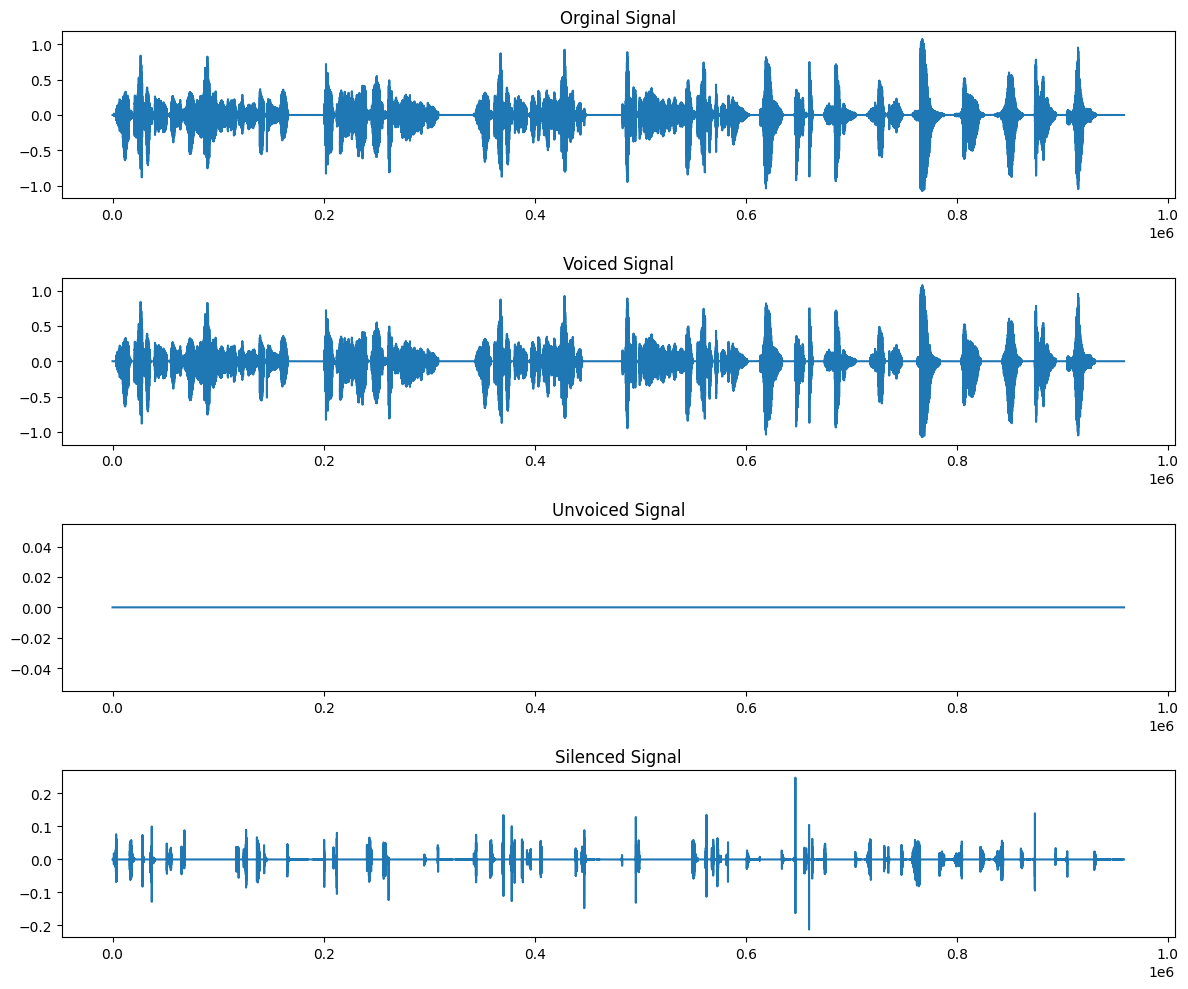

In [2]:
import numpy as np
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt

# Load a speech signal (replace 'speech.wav' with your file)
speechSignal, Fs = librosa.load('sound.mp3', sr=None)

# Parameters for voice activity detection
frame_size = int(0.02 * Fs)  # Frame size in samples (20 ms)
overlap = 0.5  # Overlap between frames (50%)
threshold_zcr = 20  # ZCR threshold to detect unvoiced segments
threshold_ste = 0.0003  # STE threshold to detect silence segments

# Initialize arrays to store results
voiced = np.zeros_like(speechSignal)
unvoiced = np.zeros_like(speechSignal)
silence = np.zeros_like(speechSignal)

for i in range(0, len(speechSignal) - frame_size, int(frame_size * (1 - overlap))):
    frame = speechSignal[i : i + frame_size]

    # Calculate zero-crossing rate
    zcr = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_size)

    # Calculate short-time energy
    ste = np.sum(frame ** 2) / frame_size

    # Classify frames into voiced, unvoiced, or silence
    if zcr > threshold_zcr:
        unvoiced[i : i + frame_size] = frame
    elif ste < threshold_ste:
        silence[i : i + frame_size] = frame
    else:
        voiced[i : i + frame_size] = frame

# Play the original speech signal
# sd.play(speechSignal, Fs)
# sd.wait()
# print('Orginal')

# # Play the separated segments
# sd.play(voiced, Fs)
# sd.wait()
# print('Voice finished')
# sd.play(unvoiced, Fs)
# sd.wait()
# print('unvoiced finished')
# sd.play(silence, Fs)
# sd.wait()
# print('Silence finished')


plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(speechSignal)
plt.title('Orginal Signal')

plt.subplot(412)
plt.plot(voiced)
plt.title('Voiced Signal')

plt.subplot(413)
plt.plot(unvoiced)
plt.title('Unvoiced Signal')

plt.subplot(414)
plt.plot(silence)
plt.title('Silenced Signal')
plt.tight_layout()
plt.show()